In [1]:
# case fatality rate

In [1]:
import argparse
import os
import pickle
import pprint
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from utils import *

data_dir = 'data'
country = pd.read_csv(os.path.join(data_dir, 'COVID_Cases_Restricted_Detailed_12042020.csv'), parse_dates=['cdc_report_dt', 'pos_spec_dt', 'onset_dt'])


print('all cases', country.shape)
percent_missing = country.isnull().sum() * 100 / len(country)
percent_missing
#df = country[country['current_status']=='Laboratory-confirmed case']
#df = country.copy()
#print(df.shape)

min_date = pd.Timestamp('2020-04-01')
max_date = pd.Timestamp('2020-11-01')

test()
time = "cdc_report_dt"



all cases (8405079, 31)
test import


In [2]:
# should we include probable case??
time = 'cdc_report_dt'
df = country[country['current_status']=='Laboratory-confirmed case']
#percent_missing = df.isnull().sum() * 100 / len(df)
#print('before:', percent_missing)

if False: # takes time to inpute 'pos_spec_dt'
    time = 'pos_spec_dt'
    df[time] = df.apply(lambda r: r[time] if not pd.isnull(r[time])
                            else (r['cdc_report_dt']), axis=1)
    #pd.to_csv(os.path.joint(data_dir, 'country_positive_test'.csv), index=False)
    df.to_csv(os.path.join(data_dir, 'country_positive_test.csv'), index=False)


#df = pd.read_csv(os.path.join(data_dir, 'country_positive_test.csv'), parse_dates=['pos_spec_dt', 'cdc_report_dt'])

# rename age_groups
print("pos inputed missingness")
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)
df['age_group'] = df['age_group'].astype('category')
df['age_group'].cat.categories
df.loc[df['age_group'].isnull(), 'age_group'] = 'Unknown'
df['age_group'].cat.rename_categories({'Unknown': '_' + 'Unknown'}, inplace=True)
df['age_group'].cat.categories

#df['age_group']
df['age_group'].cat.rename_categories({'0 - 9 Years':'0-9', 
                                       '10 - 19 Years':'10-19',
                                       '20 - 29 Years':'20-29',
                                       '30 - 39 Years':'30-39',
                                       '40 - 49 Years':'40-49', 
                                       '50 - 59 Years':'50-59',
                                       '60 - 69 Years':'60-69',
                                       '70 - 79 Years':'70-79',
                                       '80+ Years':'80+'}, inplace=True)

pos inputed missingness
race_ethnicity_combined     3.171154
current_status              0.000000
cdc_report_dt               0.000000
sex                         1.083726
onset_dt                   46.971562
pos_spec_dt                65.815377
hosp_yn                     0.000000
icu_yn                      0.000000
death_yn                    0.000000
hc_work_yn                  3.703624
pna_yn                      0.000000
abxchest_yn                 0.079253
acuterespdistress_yn        0.000000
mechvent_yn                 0.000000
fever_yn                    0.000000
sfever_yn                   0.000000
chills_yn                   0.000000
myalgia_yn                  0.000000
runnose_yn                  0.000000
sthroat_yn                  0.000000
cough_yn                    0.000000
sob_yn                      0.000000
nauseavomit_yn              0.000000
headache_yn                 0.000000
abdom_yn                    0.000000
diarrhea_yn                 0.000000
medcond_yn    

<ipython-input-2-dd6a2dbf9f99>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = df['age_group'].astype('category')
/home/cheng/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


# Percent of missingness

In [3]:
print(df['death_yn'].value_counts()/len(df))


No         0.441710
Missing    0.407923
Unknown    0.128687
Yes        0.021680
Name: death_yn, dtype: float64


In [4]:
country[country['res_state']=='IL']

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
1856,"White, Non-Hispanic",Probable Case,2020-11-15,Male,2020-11-02,NaT,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,17005.0,Bond,IL,60 - 69 Years
1857,"White, Non-Hispanic",Laboratory-confirmed case,2020-11-12,Male,2020-10-31,NaT,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,17005.0,Bond,IL,60 - 69 Years
1858,"White, Non-Hispanic",Probable Case,2020-11-10,Male,2020-10-26,NaT,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,17005.0,Bond,IL,60 - 69 Years
1859,"White, Non-Hispanic",Laboratory-confirmed case,2020-09-29,Male,2020-07-12,NaT,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,17005.0,Bond,IL,60 - 69 Years
1860,"White, Non-Hispanic",Probable Case,2020-11-15,Male,2020-10-31,NaT,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,17005.0,Bond,IL,60 - 69 Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403784,NaN,Laboratory-confirmed case,2020-07-14,NaN,2020-07-11,NaT,No,Unknown,Unknown,NaN,...,Yes,No,No,No,No,Yes,17193.0,White,IL,NaN
8403785,NaN,Laboratory-confirmed case,2020-07-14,NaN,2020-07-11,NaT,No,Unknown,Unknown,NaN,...,No,No,No,No,No,Missing,17193.0,White,IL,NaN
8403786,NaN,Laboratory-confirmed case,2020-07-02,NaN,2020-06-29,NaT,Unknown,Unknown,Unknown,NaN,...,No,No,Yes,No,No,Missing,17193.0,White,IL,NaN
8403787,NaN,Laboratory-confirmed case,2020-08-11,NaN,2020-08-03,NaT,No,Unknown,Unknown,NaN,...,Unknown,Unknown,Unknown,Unknown,Unknown,Missing,17193.0,White,IL,NaN


In [5]:
# hosp
df.loc[df['hosp_yn']!='Yes', 'hosp_yn'] = 0
df.loc[df['hosp_yn']=='Yes', 'hosp_yn'] = 1


# death
df.loc[df['death_yn']!='Yes', 'death_yn'] = 0
df.loc[df['death_yn']=='Yes', 'death_yn'] = 1



print(df['age_group'].value_counts())
print(df['hosp_yn'].value_counts())
print(df['death_yn'].value_counts())


cleaned_country = df.rename(columns={'age_group':'Age_group', 
                                    'sex': 'Gender',
                                    'hosp_yn': 'Hospitalized',
                                    'death_yn': 'Died',
                                    'current_status': 'Case'})
cleaned_country['Case'] = 1

#### se;lect  the date to use

time = 'cdc_report_dt'
cleaned_country.sort_values(by=time, inplace=True)
print(cleaned_country.columns)
florida = cleaned_country.copy()
florida = florida[['cdc_report_dt', 'Gender', 'onset_dt', 'pos_spec_dt', 'Hospitalized',  'Died', 'res_state', 'Age_group']]
florida.columns
#max_date = florida[time].max()
#min_date = florida[time].min()

/home/cheng/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


20-29       1542710
30-39       1295532
40-49       1190216
50-59       1149613
60-69        808632
10-19        775954
70-79        453880
80+          359551
0-9          273192
_Unknown      60838
Name: age_group, dtype: int64
0    7380094
1     530024
Name: hosp_yn, dtype: int64
0    7738626
1     171492
Name: death_yn, dtype: int64
Index(['race_ethnicity_combined', 'Case', 'cdc_report_dt', 'Gender',
       'onset_dt', 'pos_spec_dt', 'Hospitalized', 'icu_yn', 'Died',
       'hc_work_yn', 'pna_yn', 'abxchest_yn', 'acuterespdistress_yn',
       'mechvent_yn', 'fever_yn', 'sfever_yn', 'chills_yn', 'myalgia_yn',
       'runnose_yn', 'sthroat_yn', 'cough_yn', 'sob_yn', 'nauseavomit_yn',
       'headache_yn', 'abdom_yn', 'diarrhea_yn', 'medcond_yn',
       'county_fips_code', 'res_county', 'res_state', 'Age_group'],
      dtype='object')


Index(['cdc_report_dt', 'Gender', 'onset_dt', 'pos_spec_dt', 'Hospitalized',
       'Died', 'res_state', 'Age_group'],
      dtype='object')

# Not by age group

In [6]:
florida[florida['res_state']=='IL']

,cdc_report_dt,Gender,onset_dt,pos_spec_dt,Hospitalized,Died,res_state,Age_group
2796138,2020-01-27,Female,2020-01-13,NaT,1,0,IL,60-69
4789039,2020-03-01,Female,2020-02-13,NaT,0,0,IL,70-79
1538254,2020-03-07,Male,2020-03-01,NaT,1,0,IL,20-29
697172,2020-03-08,NaN,2020-03-05,NaT,0,0,IL,50-59
3517647,2020-03-08,Female,2020-02-26,NaT,1,0,IL,50-59
...,...,...,...,...,...,...,...,...
214714,2020-11-19,Female,2020-11-07,NaT,0,0,IL,50-59
214705,2020-11-19,Female,2020-11-07,NaT,0,0,IL,50-59
7232117,2020-11-19,Male,2020-11-06,NaT,0,0,IL,60-69
1520465,2020-11-19,Female,2020-11-01,NaT,0,0,IL,80+


In [7]:
florida[0:3]

,cdc_report_dt,Gender,onset_dt,pos_spec_dt,Hospitalized,Died,res_state,Age_group
4963196,2020-01-01,Male,2020-01-01,2020-03-15,1,0,NV,40-49
388354,2020-01-01,Female,2020-01-01,NaT,0,0,CA,30-39
3103284,2020-01-01,Female,2020-01-01,2020-07-14,0,0,NV,60-69


In [8]:
plt.rcParams['figure.figsize'] = [5.5, 4]
SMALL_SIZE = 10.5
MEDIUM_SIZE = 11
MEDIUM_Plus= 11.5
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_Plus)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# twelve states with most cases


(7908378, 9)


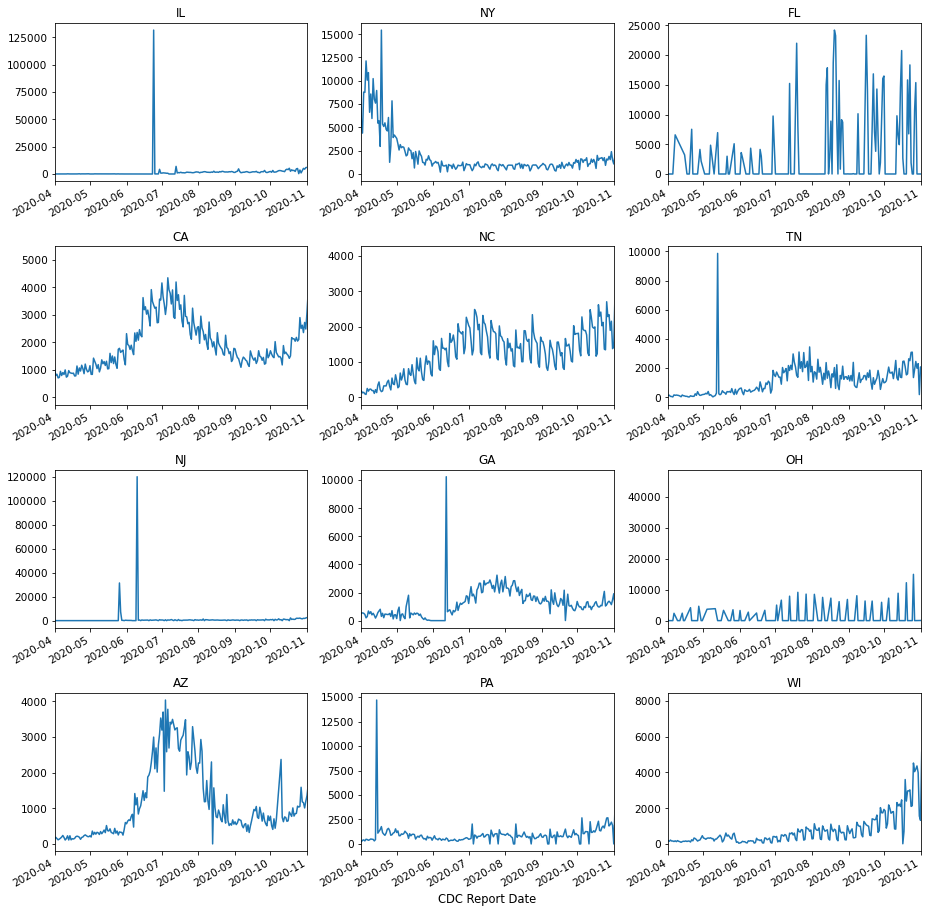

In [24]:
plt.close()
florida['all'] = 1

stat_l = florida.groupby('res_state').count().sort_values(by='all', ascending=False).index[:12].tolist()
st = 'res_state'
ns = ['OCONUS', 'Unkown']
#florida[st].unique()

df = florida
df = df[~(df[st].isin(ns)) & df[st].notna()]
#len(df)
len(df[st].unique())
print(df.shape)
num = 3

fig, ax = plt.subplots(4,num)
florida[florida['res_state']=='IL']
#plt.rcParams['figure.figsize'] = [24, 50]
#sts = ['CT','IL','NJ']
sts = stat_l
plt.rcParams.update({'figure.figsize':[13, 12.8]})

for i, s in enumerate(sts):
    #if i%6 == 0:
        r = int(i / num)
        c = i % num
        d = df[df[st]==s][[time, 'all']].set_index(time)
        ax[r][c].set_title(s)
        
        p = d.groupby(time)['all'].sum().plot(ax=ax[r][c], legend=False)
        graph_leg_acc(p, '{}'.format(sts[i]))
        ax[r][c].set_xlabel("")

ax[3][1].set_xlabel("CDC Report Date")
plt.tight_layout() 
plt.savefig('cdc_img/topcases_states.svg')
#plt.close()

# Three excluded states

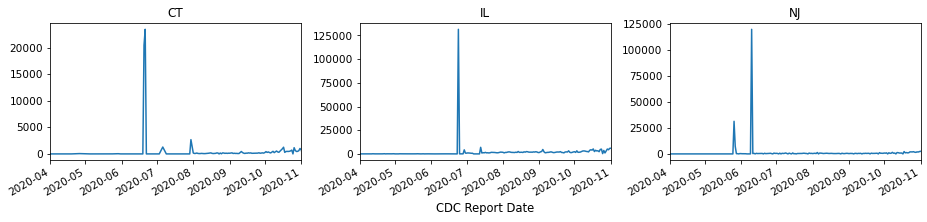

In [22]:
florida['all'] = 1
df = florida.copy()
fig, ax = plt.subplots(1,num)
sts = ['CT','IL','NJ']
plt.rcParams.update({'figure.figsize':[13, 3.2]})

for i, s in enumerate(sts):
    r = int(i / num)
    c = i % num
    d = df[df[st]==s][[time, 'all']].set_index(time)
    ax[i].set_title(s)

    p = d.groupby(time)['all'].sum().plot(ax=ax[i], legend=False)
    graph_leg_acc(p, '{}'.format(sts[i]))
    ax[i].set_xlabel("")

ax[1].set_xlabel("CDC Report Date")
plt.tight_layout() 
plt.savefig('cdc_img/exclude_states.svg')

# Cases, hospitalizations and deaths

max date: 2020-11-01 00:00:00


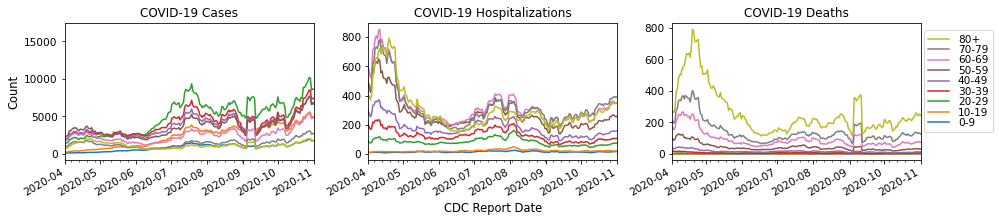

In [25]:
florida = florida[~florida['res_state'].isin(['CT','IL','NJ'])]
import matplotlib.ticker as ticker
from matplotlib import dates
from utils import *
plt.rcParams['figure.figsize'] = [13, 3.2]
#max_date = florida['Case_'].max()
print("max date:", max_date)

    
florida['all'] = 1
vrs = ['all', 'Hospitalized', 'Died'] # 'Died'
#vrs = ['Hospitalized']
lbs = ['COVID-19 Cases','COVID-19 Hospitalizations', 'COVID-19 Deaths']
grpvar='Age_group'
freq='7D'
time='cdc_report_dt'
newdf = florida#[~florida['res_state'].isin(['CT','IL','NJ'])]#[florida['res_state']=='FL']
# print(newdf.dtypes)
#newdf['Case_'] = pd.to_datetime(newdf['Case_'], format="%m/%d/%Y")
#newdf['Case_'] = newdf['Case_']
florida[time] = florida[time].astype('datetime64[ns]')

newdf.dtypes
fig, ax = plt.subplots(1,3)



for i, v in enumerate(vrs):
    amt=v
   # pdb.set_trace()
    df = get_groupby_rolling_df(newdf, grpvar, freq, amt, time)
    #pdb.set_trace()
    
    ylb = 'Count' if i==0 else ''
    xlb = 'CDC Report Date' if i==1 else ''
    df = df[df[grpvar]!='_Unknown']
    df[grpvar].cat.remove_unused_categories(inplace=True)

    #df = df[(df.index>=pd.Timestamp('2020-03-12')) & (df.index<=pd.Timestamp('2020-09-15'))]
    
    df['rolling sum'].fillna(0, inplace=True)
    #if v == 'Hospitalized':
    #    df.to_csv('hosp_country')
    p = df.groupby(grpvar)['rolling sum'].plot(ylabel=ylb, xlabel=xlb, ax=ax[i])
    #ax[i] = 
    graph_leg(p, '{}'.format(lbs[i]))
    #ax[i].set_xticklabels(map(lambda x: line_format(x), df.index))
   # ax[i].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    


   # axes[0] = p[0]
handles, labels = ax[2].get_legend_handles_labels()
#fig.legend(reversed(handles), reversed(labels),labelspacing=0.04 ,bbox_to_anchor = (1.065,0.85), borderaxespad=0.)
for i in range(3):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
plt.tight_layout()
fig.legend(reversed(handles), reversed (labels),labelspacing=0.04 ,bbox_to_anchor = (1.065,0.85), borderaxespad=0.)
fig.savefig('img_country/{}'.format('cases.svg'), bbox_inches='tight')

    


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19'],
              dtype='datetime64[ns]', name='cdc_report_dt', length=324, freq=None)
DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19'],
              dtype='datetime64[ns]', name='cdc_report_dt', length=324, freq=None)
DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03

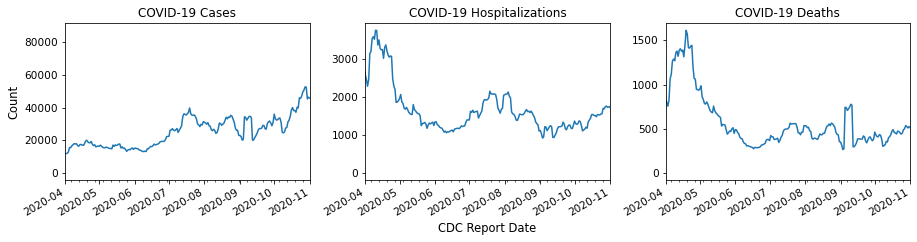

In [26]:
plt.rcParams['figure.figsize'] = [13, 3.2]

florida['all'] = 1
vrs = ['all',  'Hospitalized','Died'] # 'Died'
lbs = ['COVID-19 Cases', 'COVID-19 Hospitalizations','COVID-19 Deaths']
grpvar='Age_group'
freq='7D'
time='cdc_report_dt'
newdf = florida#[florida['res_state']=='FL']

fig, ax = plt.subplots(1,3)
dfs = []
for i, v in enumerate(vrs):
    amt=v
    df = get_rolling_df(newdf, time, freq=7, var=amt)
    dfs.append(df)

    print(df.index)
    ylb = 'Count' if i==0 else ''
    xlb = 'CDC Report Date' if i==1 else ''
    p = df[amt].plot(ylabel=ylb, xlabel=xlb, ax=ax[i], legend=False)
    #ax[i] = 
    graph_leg_acc(p, '{}'.format(lbs[i]))
   # axes[0] = p[0]
#handles, labels = ax[2].get_legend_handles_labels()
plt.tight_layout()
for i in range(3):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
#fig.legend(reversed(handles), reversed(labels),labelspacing=0.04 ,bbox_to_anchor = (1.065,0.85), borderaxespad=0.)
fig.savefig('img_country/{}'.format('cases_acc.svg'), bbox_inches='tight')


DatetimeIndex(['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12',
               ...
               '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19'],
              dtype='datetime64[ns]', name='cdc_report_dt', length=262, freq=None)
DatetimeIndex(['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12',
               ...
               '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19'],
              dtype='datetime64[ns]', name='cdc_report_dt', length=262, freq=None)
DatetimeIndex(['2020-03-03', '2020-03-04', '2020-03-05

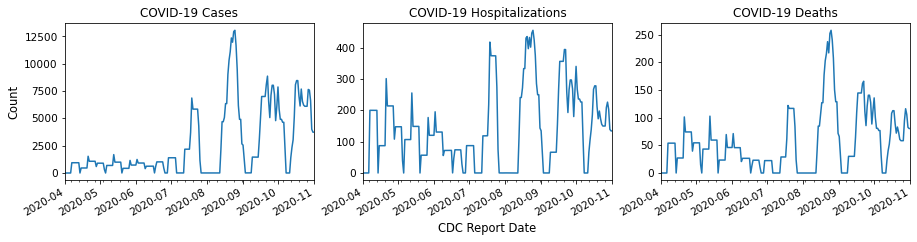

In [51]:
plt.rcParams['figure.figsize'] = [13, 3.2]

florida['all'] = 1
vrs = ['all',  'Hospitalized','Died'] # 'Died'
lbs = ['COVID-19 Cases', 'COVID-19 Hospitalizations','COVID-19 Deaths']
grpvar='Age_group'
freq='7D'
time='cdc_report_dt'
newdf = florida[florida[st]=='FL']

fig, ax = plt.subplots(1,3)
for i, v in enumerate(vrs):
    amt=v
    df = get_rolling_df(newdf, time, freq=7, var=amt)
    print(df.index)
    ylb = 'Count' if i==0 else ''
    xlb = 'CDC Report Date' if i==1 else ''
    p = df[amt].plot(ylabel=ylb, xlabel=xlb, ax=ax[i], legend=False)
    graph_leg_acc(p, '{}'.format(lbs[i]))
plt.tight_layout()
for i in range(3):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
fig.savefig('img_country/{}'.format('fl_acc.svg'), bbox_inches='tight')


# Collect CFR, HFR, CFR

df1 (3240, 3)


/home/cheng/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/frame.py:4314: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


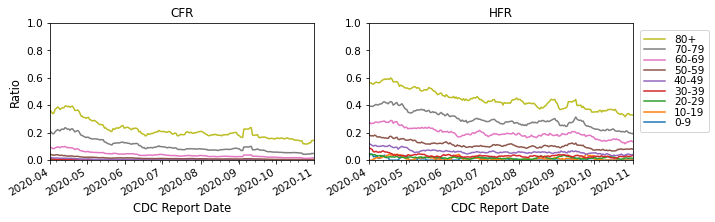

In [33]:
fig, ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [9, 3.2]

grpvar='Age_group'
freq='7D'
amt="Died"
time=time
newdf = florida[florida['Hospitalized'] ==1].copy()

# HFR
df = get_groupby_rolling_df(newdf, grpvar, freq, amt, time)
df1 = df.copy()
df1['Died'] = df1['rolling sum']
print("df1", df1.shape)
# get hospitalized
df= get_groupby_rolling_df(newdf, grpvar, freq, 'Hospitalized', time)
df2 = df
df2['Hospitalized'] = df2['rolling sum']

df3 = df1
df3['Hospitalized'] = df2['Hospitalized']
df3['HFR'] = df3['Died'] / df3['Hospitalized']

df3['HFR'].fillna(0, inplace=True)
df3 = df3[df3[grpvar]!='_Unknown']
df3[grpvar].cat.remove_unused_categories(inplace=True)

p = df3.groupby(grpvar)['HFR'].plot(legend=False, ax=ax[1])
p[0].set_xlabel("")
graph_leg(p, 'HFR')

####merge
newdf = florida
newdf['all'] = 1
# all died
df = get_groupby_rolling_df(newdf, grpvar, freq, 'Died', time)
df1 = df.copy()
df1['Died'] = df1['rolling sum']
# all hosp
df = get_groupby_rolling_df(newdf, grpvar, freq, 'Hospitalized', time)
df2 = df.copy()
df2['Hospitalized'] = df2['rolling sum']
#all
df = get_groupby_rolling_df(newdf, grpvar, freq, 'all', time)
df['all'] = df['rolling sum']
df = df[[grpvar, 'all']].merge(df1[[grpvar, 'Died']], on=[time, grpvar], how='outer')
df = df[[grpvar, 'all', 'Died']].merge(df2[[grpvar, 'Hospitalized']], on=[time, grpvar], how='outer')
df[['Died', 'Hospitalized']].fillna(0, inplace=True)
##########CFR
df['CFR'] = df['Died']/df['all']
df = df[df[grpvar]!='_Unknown']
df[grpvar].cat.remove_unused_categories(inplace=True)
p = df.groupby(grpvar)['CFR'].plot(legend=False, ax=ax[0])

fig = p[0].get_figure()
graph_leg(p, 'CFR')
p[0].set_xlabel("")
ax[1].set_title('HFR')
ax[0].set_ylim(0.0, 0.5)
ax[0].set_ylabel('Ratio')
ax[1].set_xlabel('CDC Report Date')
for i in range(2):
    ax[i].set_ylim(0, 1)
    
for i in range(2):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
    ax[i].set_xlabel('CDC Report Date')

handles, labels = ax[1].get_legend_handles_labels()
plt.tight_layout()
fig.legend(reversed(handles), reversed(labels),labelspacing=0.04 ,bbox_to_anchor = (1.1,0.85), borderaxespad=0.)
fig.savefig('img_country/{}'.format('CFR_HFR.svg'), bbox_inches='tight')


# hosp / covid

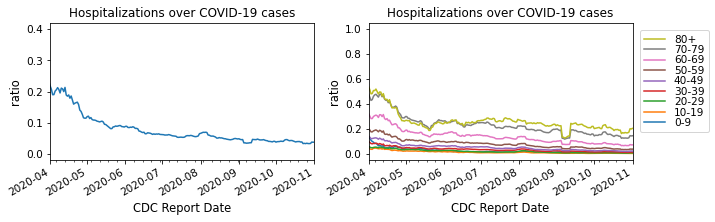

In [50]:
plt.rcParams['figure.figsize'] = [9, 3.2]
fig, ax = plt.subplots(1,2)

newdf = florida
df = get_groupby_rolling_df(newdf, grpvar, freq, 'Hospitalized', time)
df2 = df.copy()
df2['Hospitalized'] = df2['rolling sum']
df = get_groupby_rolling_df(newdf, grpvar, freq, 'all', time)
df['all'] = df['rolling sum']
df = df[[grpvar, 'all']].merge(df2[[grpvar, 'Hospitalized']], on=[time, grpvar], how='outer')
df['Hosp_all'] = df['Hospitalized']/df['all']
df = remove_unkown(df, grpvar)
p = df.groupby(grpvar)['Hosp_all'].plot( legend=False, ax=ax[1])#.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
graph_leg(p, 'Hospitalizations over COVID-19 cases')
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(reversed(handles), reversed(labels),labelspacing=0.04 ,bbox_to_anchor = (1.1,0.85),borderaxespad=0.)


ax[1].set_ylabel('ratio')
ax[1].set_xlabel('CDC Report Date')
newdf = florida
df = get_rolling_df(newdf, time, freq=7, var='Hospitalized')
df2 = df.copy()
df = get_rolling_df(newdf, time, freq=7, var='all')
df = df[['all']].merge(df2[['Hospitalized']], on=[time], how='outer')
df['Hosp_all'] = df['Hospitalized']/df['all']
p = df['Hosp_all'].plot( legend=False, ax=ax[0])#.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
graph_leg_acc(p, 'Hospitalizations over COVID-19 cases')
ax[0].set_ylabel('ratio')
ax[0].set_xlabel('CDC Report Date')

for i in range(2):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
plt.tight_layout()
fig.savefig('img_country/{}'.format('hosp_over_covid.svg'), bbox_inches='tight')


# Top five vs. the rest barplots

In [36]:
florida.columns

Index(['cdc_report_dt', 'Gender', 'onset_dt', 'pos_spec_dt', 'Hospitalized',
       'Died', 'res_state', 'Age_group', 'all'],
      dtype='object')

In [42]:
top5 = florida[(florida[time]>=min_date) & (florida[time]<=max_date)].groupby(st).sum().sort_values(by='all')[-5:].reset_index()[st].tolist()#nlargest(5)

florida['state'] = florida[st].apply(lambda s: s if s in top5  else 'Other').astype('category')

In [43]:
def get_bar_chart(amt, newdf, time, name, ax, it, grpvar='Age_group'):
    min_date = "2020-04-01"
    max_date = "2020-11-01"
    #grpvar = 'state'
    freq = '7D'
    df = get_groupby_rolling_df(newdf, grpvar, freq, amt, time)
    df[amt] = df['rolling sum']
    daily = get_rolling_df(newdf, time=time, freq=7, var=amt)
    daily[amt].fillna(0, inplace=True)
    daily.rename(columns={amt:'died_daily'}, inplace=True)

    merged = df.merge(daily, left_index=True, right_index=True)
    merged['died_ratio'] = merged[amt] / merged['died_daily']
    m = merged[(merged.index >=min_date) & (merged.index<=max_date)]
    if it==1:
        m.to_csv('case_ratio_country.csv')
    ylb = 'Ratio' if it==0 else ''
    xlb = 'CDC Report Date' if it==1 else ''
    p = m.set_index(grpvar,append=True)['died_ratio'].unstack().plot(ylabel=ylb, xlabel=xlb, stacked=True, ax=ax, kind='bar', legend=False)

    ticklabels = ['']*len(m.index.unique())
    ticklabels[::1] = ['{} {} {}'.format(item.year, item.month, item.day)for item in m.index.unique()[::1]]
    t1 = []
    thre = 0
    for i, item in enumerate(ticklabels):
        y, m, d = item.split(" ")
        blackout = 14 if name == 'COVID-19 Cases' else 30
        max_item = (newdf[time].max()- pd.Timedelta(days=blackout))
        max_y, max_m, max_d = max_item.year, max_item.month, max_item.day
        if m==str(max_m) and d==str(max_d):
            thre = i+1
        if d!='1':
            t1.append("")
        else:
            t1.append("2020-{}".format(m))

    p.xaxis.set_major_formatter(ticker.FixedFormatter(t1))
    plt.gcf().autofmt_xdate()
    graph_leg_save_bar(p, name, thre/len(t1))   

In [44]:
florida['state'].cat.reorder_categories(top5[::-1]+['Other'], inplace=True)


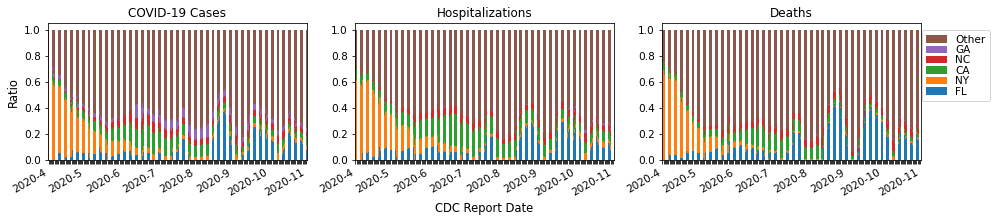

In [45]:
plt.rcParams['figure.figsize'] = [13, 3.2]

fig, ax = plt.subplots(1,3)
vrs = ['all', 'Hospitalized', 'Died'] # 'Died'
lbs = ['COVID-19 Cases','Hospitalizations', 'Deaths']

for i, v in enumerate(vrs):
    get_bar_chart(v, florida.copy(), time, '{}'.format(lbs[i]), ax[i], i, 'state')
    
handles, labels = ax[2].get_legend_handles_labels()
plt.tight_layout()
fig.legend(reversed(handles), reversed(labels), labelspacing=0.04 ,bbox_to_anchor = (1.062,0.85), borderaxespad=0.)
fig.savefig('img_country/{}'.format('top_states.svg'), bbox_inches='tight')  

# Bar plots for age ratios

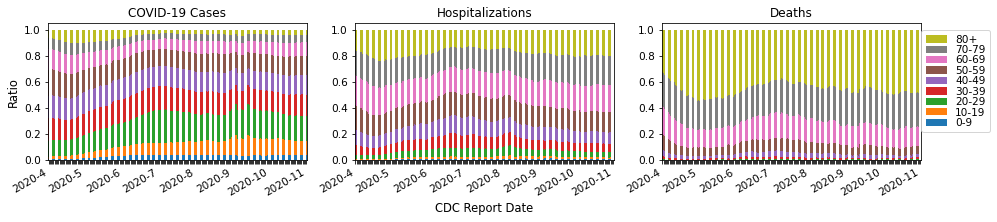

In [46]:
#smoothed
#plt.rcParams['figure.figsize'] = [16, 3.2]
plt.rcParams['figure.figsize'] = [13, 3.2]

fig, ax = plt.subplots(1,3)
#vrs = ['all'] #, 'Died', 'Hospitalized'] # 'Died'
#lbs = ['COVID-19 Cases','Deaths', 'Hospitalizations']

vrs = ['all', 'Hospitalized', 'Died'] # 'Died'
lbs = ['COVID-19 Cases','Hospitalizations', 'Deaths']

florida['Age_group']
for i, v in enumerate(vrs):
    
    get_bar_chart(v, florida[florida['Age_group'] != '_Unknown'].copy(), time, '{}'.format(lbs[i]), ax[i], i)
    
handles, labels = ax[2].get_legend_handles_labels()
plt.tight_layout()
fig.legend(reversed(handles), reversed(labels), labelspacing=0.04 ,bbox_to_anchor = (1.062,0.85), borderaxespad=0.)
fig.savefig('img_country/{}'.format('age_ratios.svg'), bbox_inches='tight')  

# Female ratio

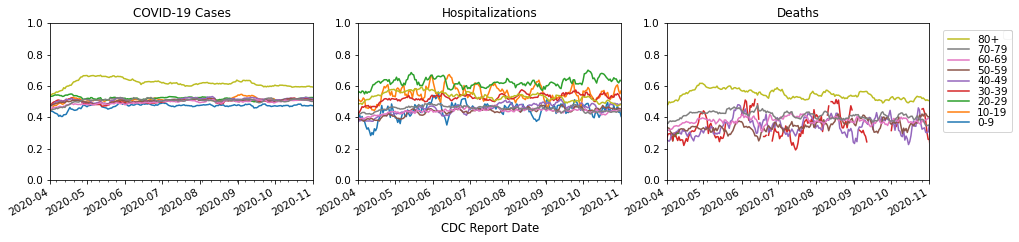

In [49]:
plt.rcParams['figure.figsize'] = [13, 3.2]

vrs = ['all', 'Hospitalized', 'Died'] # 'Died'
lbs = ['COVID-19 Cases', 'Hospitalizations','Deaths']
sv = ['all', 'hosp', 'death']
fig, ax = plt.subplots(1, 3)
plt.cla()

for i, v in enumerate(vrs):
    new_var = "f_{}".format(v)
    newdf[new_var] = 0
    newdf.loc[(newdf['Gender'] == 'Female') & (newdf[v] == 1), new_var] = 1
    df = get_groupby_rolling_df(newdf, grpvar, freq, new_var, time)
    df[new_var] = df['rolling sum']
    df_org = get_groupby_rolling_df(newdf, grpvar, freq, v, time)
    df[v] = df_org['rolling sum']
    df['female_prop'] = df[new_var] / df[v]
    cats = df[grpvar].cat.categories
    everylevel = pd.DataFrame(list(product(df.index.unique(), df[grpvar].cat.categories)), columns=[time, grpvar])
    df = df[df[v] >=5]
    df = df.merge(everylevel, on=[time, grpvar], how='outer')
    df.sort_values(by=time,inplace=True)
    df.index = df[time]
    df[grpvar] = df[grpvar].astype('category')
    df[grpvar].cat.reorder_categories(cats, inplace=True)
    df = remove_unkown(df, grpvar)
    p = df.groupby(grpvar)['female_prop'].plot(ax=ax[i], legend=False)

    graph_leg(p, '{}'.format(lbs[i]))
    ax[i].set_title("{}".format(lbs[i]))
    ax[i].set_xlabel("")
    ax[i].set_ylim(0,1)
    handles, labels = ax[2].get_legend_handles_labels()
    fig.legend(reversed(handles), reversed(labels), labelspacing=0.04 ,bbox_to_anchor = (1.065,0.85), borderaxespad=0.)
    plt.tight_layout()
ax[1].set_xlabel('CDC Report Date')
for i in range(3):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
fig.savefig('img_country/{}'.format('gender_age_female.svg'.format(sv[i])), bbox_inches='tight')  
